**Name : Danesh A/L Durairetnam**

**Matric No.: WQD180067 (17029027/1)**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'output/dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           256 non-null    object 
 1   day            256 non-null    int64  
 2   month          256 non-null    int64  
 3   weekday        256 non-null    int64  
 4   neg            256 non-null    float64
 5   neu            256 non-null    float64
 6   pos            256 non-null    float64
 7   compound       256 non-null    float64
 8   closing_price  256 non-null    float64
 9   open_price     255 non-null    float64
 10  daily_high     256 non-null    float64
 11  daily_low      256 non-null    float64
 12  past_change    256 non-null    float64
 13  future_change  256 non-null    float64
dtypes: float64(10), int64(3), object(1)
memory usage: 28.1+ KB


In [4]:
df['day'] = df.day.astype('category')
df['month'] = df.month.astype('category')
df['weekday'] = df.weekday.astype('category')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Date           256 non-null    object  
 1   day            256 non-null    category
 2   month          256 non-null    category
 3   weekday        256 non-null    category
 4   neg            256 non-null    float64 
 5   neu            256 non-null    float64 
 6   pos            256 non-null    float64 
 7   compound       256 non-null    float64 
 8   closing_price  256 non-null    float64 
 9   open_price     255 non-null    float64 
 10  daily_high     256 non-null    float64 
 11  daily_low      256 non-null    float64 
 12  past_change    256 non-null    float64 
 13  future_change  256 non-null    float64 
dtypes: category(3), float64(10), object(1)
memory usage: 25.0+ KB


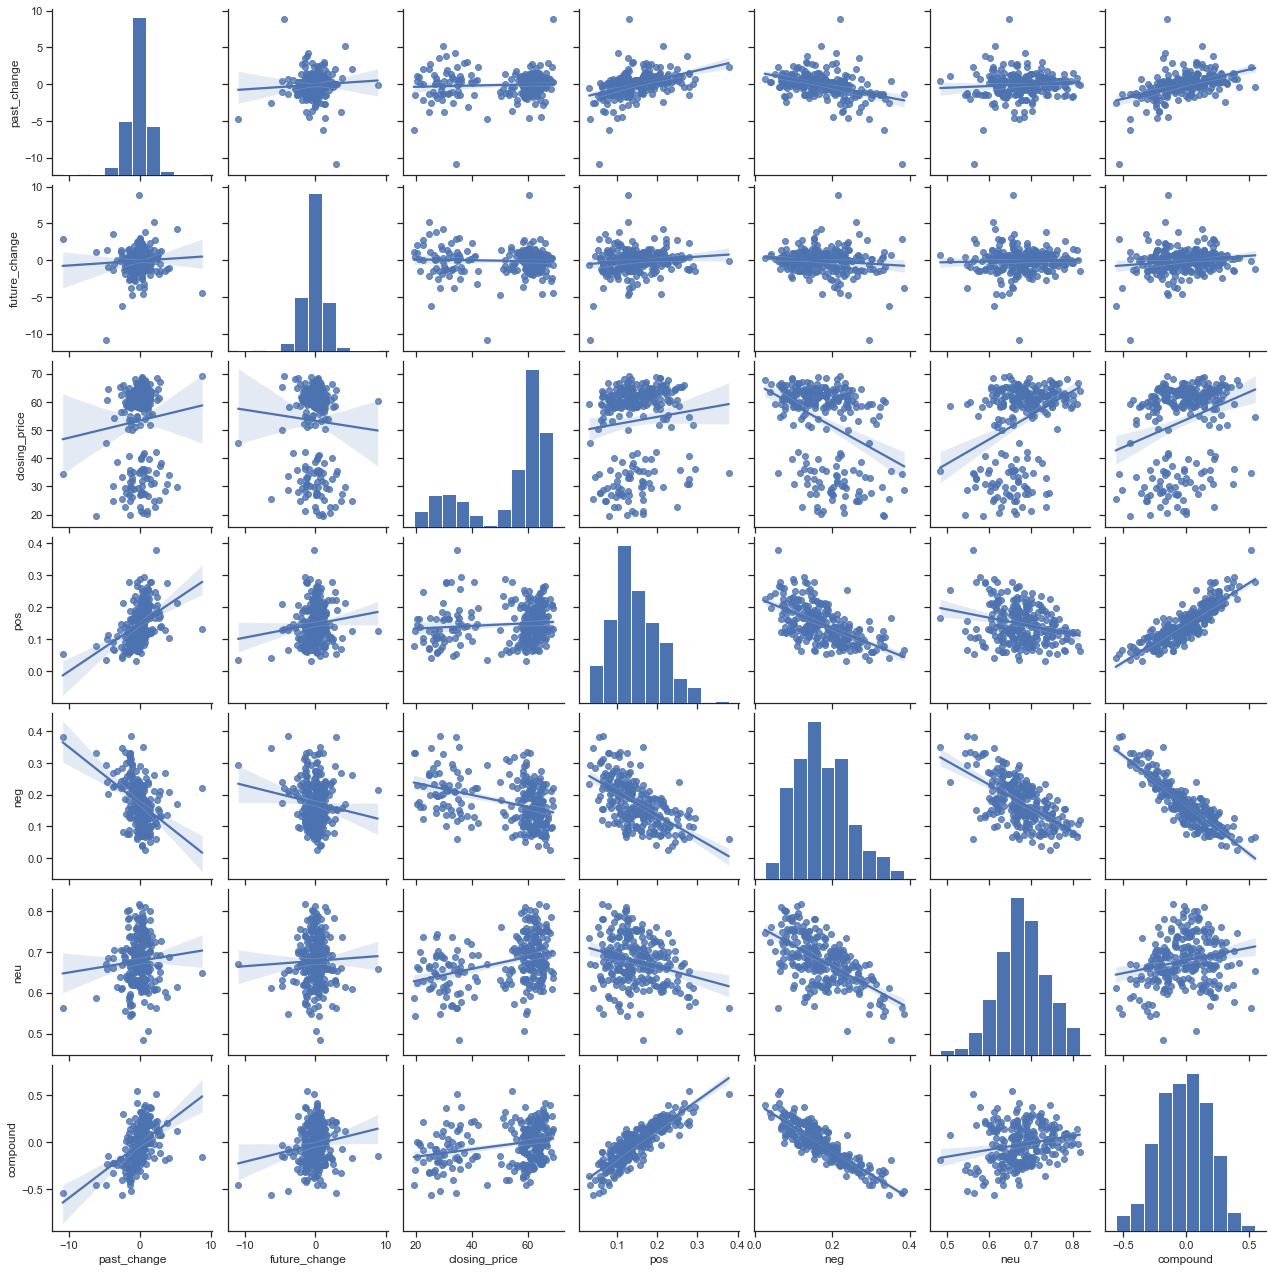

In [6]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df[['past_change','future_change','closing_price', 'pos', 'neg', 'neu', 'compound']], kind="reg")

There's a strong relationship between the sentiment values (positive, negative, neutral, compound). The past and future changes do not impact the closing price much.

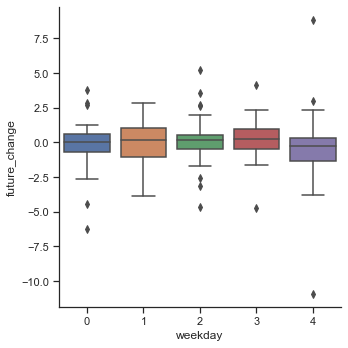

In [7]:
sns.catplot(x="weekday", y="future_change", kind="box", data=df);

Weekdays have little impact on future oil prices

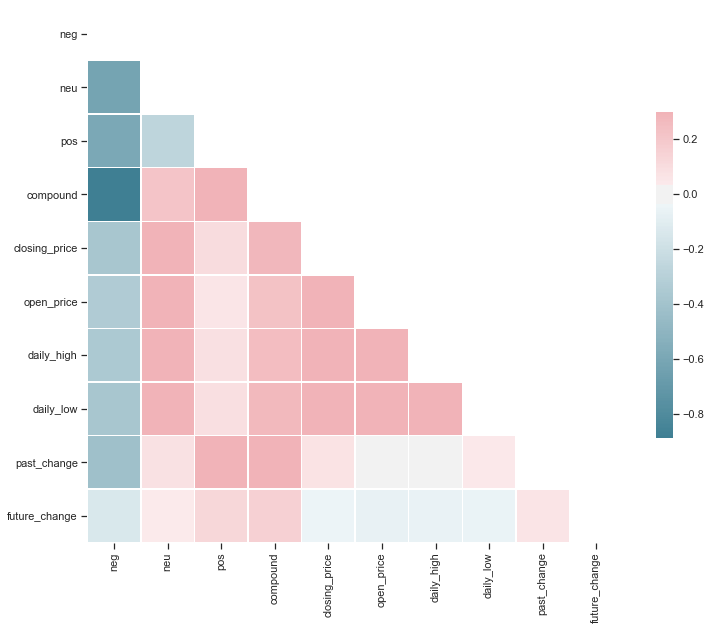

In [8]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Sentiment has a noticeable correlation with the closing price. Negative and neutral sentiments are stornger than positive.

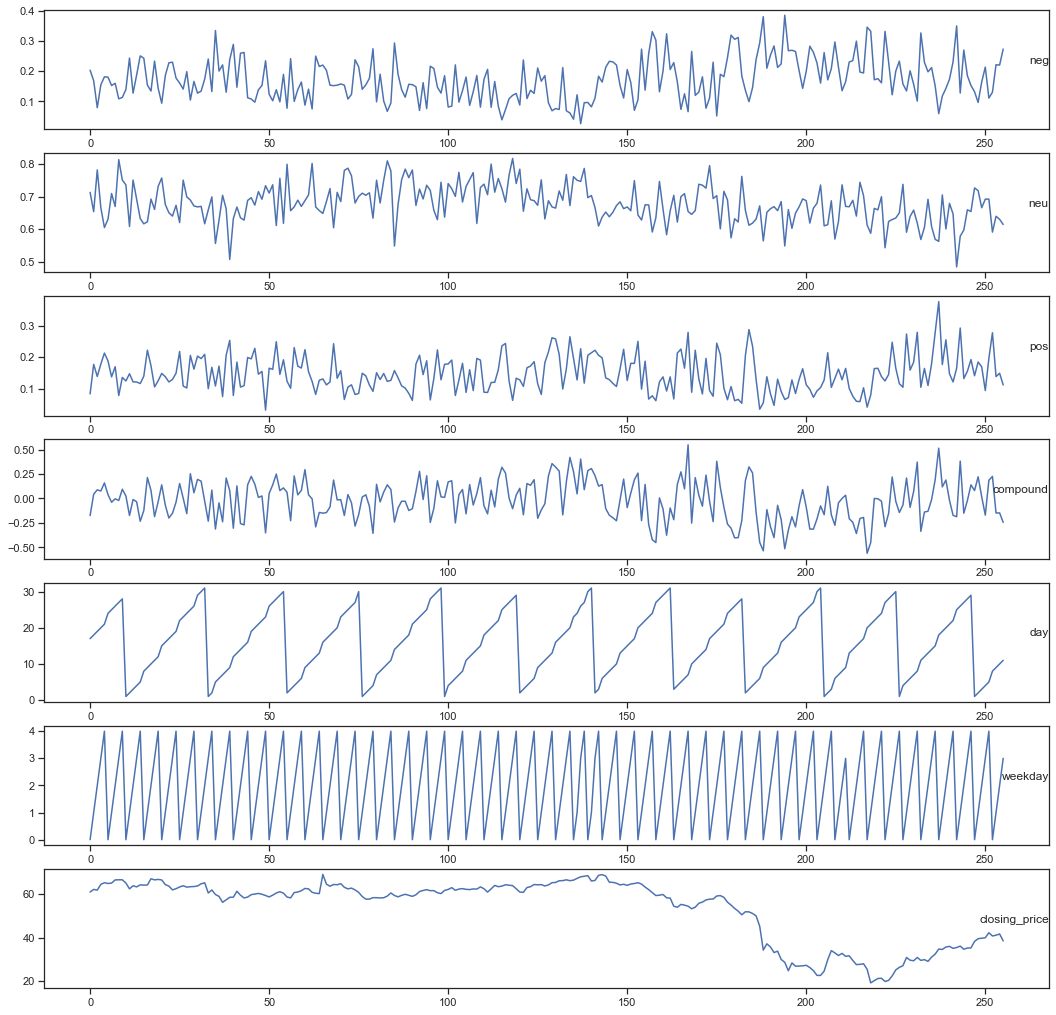

In [9]:
# specify columns to plot
groups = ['neg', 'neu', 'pos', 'compound', 'day', 'weekday', 'closing_price']
i = 1

# plot each column
plt.figure(figsize=(18, 18))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(df[group])
	plt.title(group, y=0.5, loc='right')
	i += 1
plt.show()

Day and weekdays have no noticeable impact on closing prices. Negative sentiments seem highly correlated especially in the 200-250 range when coronavirus impacted oil orices significantly.